# data_input_demo

Quick demo on the preprocessing and labelling of data for use with the TFLearn API (http://tflearn.org/)
Based on [this](https://github.com/tflearn/tflearn/blob/master/examples/images/convnet_cifar10.py) TFLearn example   

tested with: 
* python 2.7
* tensorflow v1.5.0  
* tflearn v0.3.2

In [3]:
# For python 2.7
from __future__ import division, print_function, absolute_import

# TFLearn
import tflearn
from tflearn.data_utils import shuffle, to_categorical
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation

Download the [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset

* 60,000 tiny (32 x 32) images
* There are 10 different classes of image, and 6000 images of each class (see link)
* The types are mutually exclusive
* 5 training batches and one test batch
    
We will download both training and testing (validation) data 

In [14]:
from tflearn.datasets import cifar10
(data, labels), (test_data, test_labels) = cifar10.load_data()

Have a look at the data and labels, to understand the format. We see that:

* Data and labels are python lists
* For each list entry, data has an 32x32x3 array (3 colours for each pixel in a 32x32 image)
* Labels is a list of labels, with the label values being 0 - 9 (10 classes of image)

data:  (50000, 32, 32, 3)
data[0][:][:][0]:  [[0.23137255 0.24313725 0.24705882]
 [0.16862745 0.18039216 0.17647059]
 [0.19607843 0.18823529 0.16862745]
 [0.26666667 0.21176471 0.16470588]
 [0.38431373 0.28627451 0.20392157]
 [0.46666667 0.35686275 0.24705882]
 [0.54509804 0.41960784 0.29411765]
 [0.56862745 0.43137255 0.31372549]
 [0.58431373 0.45882353 0.34901961]
 [0.58431373 0.47058824 0.36470588]
 [0.51372549 0.40392157 0.30196078]
 [0.49019608 0.38823529 0.29803922]
 [0.55686275 0.45098039 0.35686275]
 [0.56470588 0.43921569 0.3372549 ]
 [0.5372549  0.41176471 0.30980392]
 [0.50588235 0.38039216 0.27843137]
 [0.5372549  0.41568627 0.30980392]
 [0.5254902  0.41568627 0.29803922]
 [0.48627451 0.38039216 0.25098039]
 [0.54509804 0.44313725 0.30588235]
 [0.54509804 0.43921569 0.29411765]
 [0.52156863 0.41176471 0.27058824]
 [0.53333333 0.41176471 0.29019608]
 [0.54509804 0.42352941 0.30196078]
 [0.59607843 0.47058824 0.34901961]
 [0.63921569 0.51372549 0.39215686]
 [0.65882353 0.5333

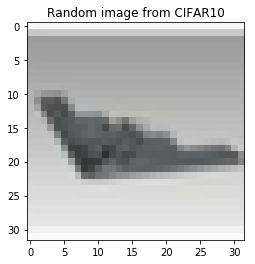

In [28]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

print ("data: ", np.shape(data))
print ("data[0][:][:][0]: ", data[0][:][:][0])
print ("")
print ("labels: ", np.shape(labels))
print ("labels[0:10]: ", labels[0:10])
print ("maximum value of labels: ", np.max(labels))
print ("minimum value of labels: ", np.min(labels))
print ("")
print ("Look at a random image:")
# look at a random image
N = np.shape(data)[0] # number of images
ranN = int(np.random.uniform(0, N))
plt.imshow(data[ranN])
plt.title("Random image from CIFAR10")

# and its corresponding label
print ("this image has label: ", labels[ranN])

Now we understand what the data look like, how can we input this to a network?

Following the TFLearn example, we eventually come to:
```
model = tflearn.DNN(network, tensorboard_verbose=0)
model.fit(data, labels, etc...)
```

So the next step: 

* How can we apply this to our data set? 
* What preprocessing will need to be done?
* Can you write a simple function to do this preprocessing?